#  K-Means 算法

## 十, K-Means 算法

### 1, 聚类

前面接触的算法, 都是 **监督学习** , 即训练数据中自变量(特征)和因变量(结果)都是已知的, 用含有结果的训练集建立模型,
然后对未知结果的数据进行预测

聚类属于 **无监督学习** , 训练数据中没有”已知结果的监督”. 聚类的目的, 就是通过已知样本数据的特征, 将数据划分为若干个类别,
每个类别成一个类簇, 使得同一个簇内的数据相似度越大, “物以类聚”, 不同簇之间的数据相似度越小, 聚类效果越好

聚类的样本相似度根据距离来度量

### 2, K-Means

即 K 均值算法, 是常见的聚类算法, 该算法将数据集分为 K 个簇, 每个簇使用簇内所有样本的均值来表示, 该均值称为”质心”

K-Means 算法的目标, 就是选择适合的质心, 使得每个簇内, 样本点距质心的距离尽可能的小, 从而保证簇内样本有较高相似度

算法实现步骤:

a, 从样本中选择 K 个点作为初始质心  
b, 计算每个样本点到各个质心的距离, 将样本点划分到距离最近的质心所对应的簇中  
c, 计算每个簇内所有样本的均值, 使用该均值作为新的质心  
d, 重复 b 和 c, 重复一定次数质心一般会趋于稳定, 如果达到以下条件, 重复结束:  
– 质心位置变化小于指定的阈值  
– 达到最迭代环次数

对于算法的实现步骤, 我们有几个重要的疑问:

– 1.怎么评价质心是否达到了最佳位置?  
– 2.初始质心随机选, 还是选在哪里?  
– 3. K 值怎么定?

### 3, 算法优化目标

样本的相似度是根据距离来度量的, 一般使用簇内 **误差平方和** (within-cluster SSE 簇惯性) 来作为优化算法的目标函数,
距离常用欧氏距离, 优化目标就是使 SSE 最小化:

$$S S E=\sum_{i=1}^{k}
\sum_{j=1}^{m_{i}}\left(\left|x_{j}-\mu_{i}\right|^{2}\right)$$

k: 族的数量

$m_{i}$: 第 i 个簇含有的样本数量

${\mu}_{i}$: 第 i 个族的质心

$\left|x_{j}-\mu_{i}\right|$: 第 i 个族中，每个样本 $x_{j}$ 与质心 $\mu_{i}$ 的距离

同一个数据集, 相同的簇数, SSE 越小, 通常质心位置更佳, 算法模型更好

### 4, 初始质心的影响

初始质心可以随机选择, 但由于算法是通过迭代初始质心一步步实现, 初始质心的位置受随机性影响, 算法训练的最终结果也会受到影响

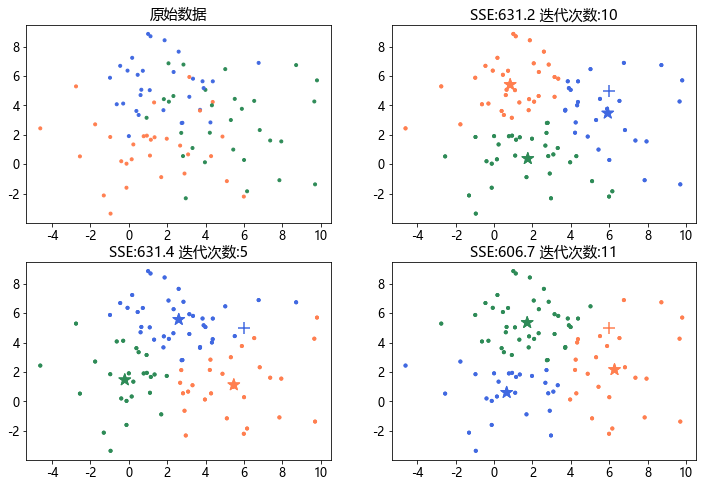

In [2]:
import numpy as np  
from sklearn.cluster import KMeans  
from sklearn.datasets import make_blobs  
import matplotlib.pyplot as plt  

plt.rcParams['font.family'] = 'Microsoft YaHei'   
plt.rcParams['font.size'] = 12   
plt.rcParams['axes.unicode_minus'] = False   

'''  
生成数据:  
n_samples: 样本数量  
n_features: 特征数  
centers: 聚类中心  
cluster_std: 簇的标准差, 可以统一指定, 也分别指定  
'''  
centers = [[1, 1], [5, 2], [2, 5]]  
x, y = make_blobs(n_samples=90,  
                  n_features=2,  
                  centers=centers,  
                  cluster_std=[2.2, 2.5, 2],  
                  random_state=0)  
# x 是特征, y 是类别标签  

# 绘制原始数据  
plt.figure(figsize=(12,8))  
plt.subplot(221)  
colors = np.array(['Coral', 'SeaGreen', 'RoyalBlue'])  
plt.scatter(x[:, 0], x[:, 1], c=colors[y], marker='.', label='原始数据')  
plt.title('原始数据')  

# 定义绘制聚类结果的函数  
def plot_cluster(model, train, test=None):  
    global colors  # 使用上面的颜色  
    cc = model.cluster_centers_ # 获取质心  
    label = model.labels_ # 获取聚类结果的标签  
    # 绘制质心  
    plt.scatter(cc[:, 0], # 质心的 x 坐标  
                cc[:, 1], # 质心的 y 坐标  
                marker='*',  
                s=150,  
                c=colors)  
    # 绘制训练集  
    plt.scatter(train[:, 0], train[:, 1], marker='.', c=colors[label])  
    # 绘制测试集  
    if test is not None:  
        y_hat = model.predict(test)  
        plt.scatter(test[:, 0], test[:, 1], marker='+',  
                    s=150, c=colors[y_hat])          
    # 标题  
    plt.title(f'SSE:{model.inertia_:.1f} 迭代次数:{model.n_iter_}')  

# 测试集  
test = np.array([[6, 5]])      
# 绘制不同初始质心的聚类结果  
seed = [1, 10, 100]  
for i in range(2, 5):  
    plt.subplot(2, 2, i)  
    kmeans = KMeans(n_clusters=3, # 簇数  
                    init='random', # 初始化方式  
                    n_init=1, # 初始化质心组数  
                    random_state=seed[i-2])  
    kmeans.fit(x)  
    plot_cluster(kmeans, x)  
    # 测试结果  
    plot_cluster(kmeans, x, test)  

从上图可以看出受初始化质心的影响, 聚类效果(SSE) 与 收敛速度(迭代次数) 会不同, 也即是可能会收敛到局部最小, 而不是整体最优; 同时,
也可以看出 SSE 越小, 整体结果越优, 越接近原始数据

### 5, K-Means++ 优化

针对上述初始化质心造成的问题, 设置初始化多组质心可以得到缓解, 但通常限于聚类簇数较少的情况, 如果簇数较多, 可能就不会有效

于是有了 K-Means++, 选择初始化质心时, 不在随机选, 而是按下述步骤进行选择:

– 1, 从训练数据中随机选择一个样本点, 作为初始质心  
– 2, 对任意一个非质心样本点 $x^{(i)}$, 计算 $x^{(i)}$ 与现有最近质心的距离 $D\left(x^{(i)}\right)$  
– 3, 根据概率 $\frac{D\left(x^{(i)}\right)^{2}}{\sum_{j=1}^{m}
D\left(x^{(j)}\right)^{2}}$ 最大, 来选择最远的一个样本点 $x^{(i)}$ 作为质心, m 为非质心样本点数量  
– 4, 重复 2 和 3, 直到选择了 K 个质心为止

做了优化之后, 保证了初始质心不会集中, 而是分散在数据集中

下面试试 K-Means++ 的聚类效果:

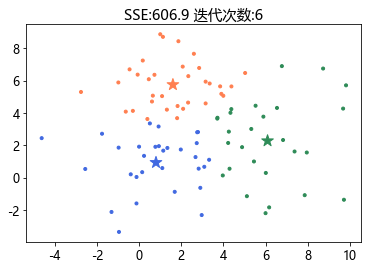

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1)  
kmeans.fit(x)  
plot_cluster(kmeans, x)  

### 6, 确定 K 值

K 是超参数, 需要预先人为指定

有时需要按照建模的需求和目的来选择聚类的个数, 但是 K 值选择不当, 聚类效果可能不佳. 例如实际 3 类, K 选了 10, 或者 K 无限制,
取值和样本点个数一样, 最后每个点一个类, SEE 为 0, 但是聚类已经毫无意义

如果不是硬性要求 K 的取值, 怎么确定最佳的 K 值呢? 一个比较好的方法就是 **肘部法则** :

SEE 需要越小越好, K 又不能取太大, 我们可以看看他们之间的关系:

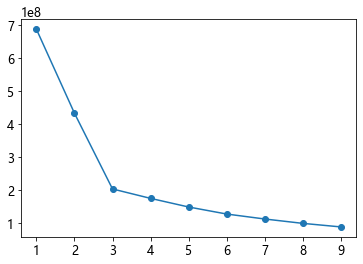

In [8]:
# 设置列表储存 SSE  
sse = []  
# K 值从 1~9 变化  
scope = range(1, 10)  
for k in scope:  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(x)  
    sse.append(kmeans.inertia_)  

plt.xticks(scope)  
plt.plot(scope, sse, marker='o')  
plt.show()  

从上图可以看出, K 增加, SSE 减小, 但当 K > 3 时, K 再增加, SSE 减小变得缓慢, 所以 K 选择 3, 实际情况也是 3

### 6, Mini Batch K-Means

K-Means 每次迭代都会使用所有数据参与运算, 当数据集较大时, 会比较耗时. Mini Batch K-Means (小批量 K-Means)
算法每次迭代使用小批量样本训练, 逐批次累计的方式进行计算, 从而大大减少计算时间. 效果上, 通常只是略差于 K-Means

Mini Batch K-Means 算法实现步骤:

a, 从数据集中随机选择部分数据, 使用 K-Means 算法在这部分数据上聚类, 获取质心  
b, 再从数据集中随机选择部分数据, 分别分配给最近的质心  
c, 每个簇根据现有的数据集更新质心  
d, 重复 b 和 c, 直到质心变化小于指定阈值或达到最大迭代次数

下面比较一下两个算法:

K-Means耗时: 0.051812171936035156
Mini Batch K-Means耗时: 0.04886937141418457


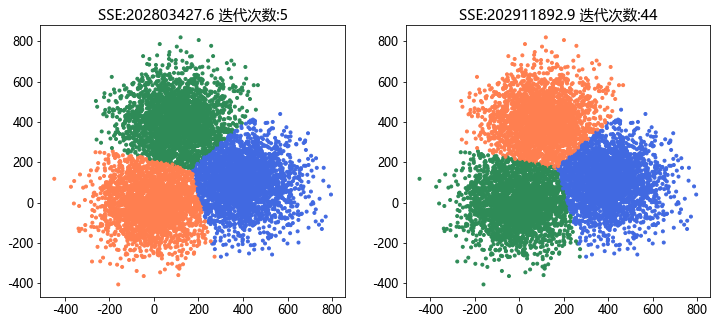

In [11]:
import time  
import pandas as pd  
from sklearn.cluster import MiniBatchKMeans  
from sklearn.metrics.pairwise import pairwise_distances_argmin  

import warnings
warnings.filterwarnings('ignore')

# 生成数据  
centers = [[1, 1], [400, 100], [100, 400]]  
x, y = make_blobs(n_samples=8000, n_features=2, centers=centers,  
                  cluster_std=120, random_state=0)  

# 定义函数, 用于计算模型训练时间  
def elapsed_time(model, data):  
    start = time.time()  
    model.fit(data)  
    end = time.time()  
    return end - start  

n_clusters = len(centers)  
kmeans = KMeans(n_clusters=n_clusters)  
mbk = MiniBatchKMeans(n_clusters=n_clusters,  
                      batch_size=200, # 小批量的大小  
                     n_init=10 # 和 KMeans 统一为 10  
                     )  
kmeans_time = elapsed_time(kmeans, x)  
mbk_time = elapsed_time(mbk, x)  

print('K-Means耗时:', kmeans_time)  
print('Mini Batch K-Means耗时:', mbk_time)  

# 绘制聚类效果  
plt.figure(figsize=(12, 5))  
model = [kmeans, mbk]  
for i, m in enumerate(model, start=1):  
    plt.subplot(1, 2, i)  
    plot_cluster(m, x)  

可见, 聚类耗时 K-Means 更多, 如果数据量很大, 耗时会更明显, 而聚类效果基本一样. 但发现颜色对不上, 这是因为质心的随机性,
聚类之后质心虽然最终落在相同的位置, 但是顺序不一致, 从而聚类的结果标签不一致, 即使是同一个算法, 运行几次, 标签结果也会不一致

我们将相同簇用相同的颜色绘制:

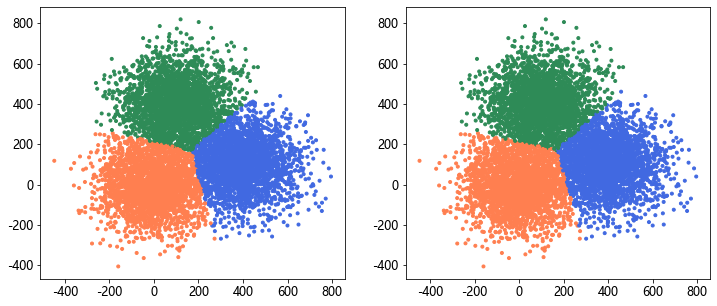

In [12]:
plt.figure(figsize=(12, 5))  
# 定义列表, 用来保存两个模型预测结果  
y_hat_list = []  
for i, m in enumerate(model, start=1):  
    plt.subplot(1, 2, i)  
    y_hat = m.predict(x)  
    if m == mbk:  
        '''  
        因为输出的质心顺序就是训练结果标签的顺序  
        故可以按 mbk 训练的质心, 去找 kmeans 训练的相同簇的质心  

        pairwise_distances_argmin(x, y) 解释:  
        依次取出数组 X 中的元素 x,   
        计算找到数组 Y 中与 x 距离最近的元素 y 的索引,   
        返回索引构成的数组  
        '''  
        # 将两者相同簇的质心一一对应并按 mbk 质心的顺序封装成字典  
        ar = pairwise_distances_argmin(  
        mbk.cluster_centers_, kmeans.cluster_centers_)  
        dict_ = dict(enumerate(ar))  
        # 用 mbk 的训练结果标签 y_hat 就可以寻找到对应的 kmeans 的质心  
        y_hat = pd.Series(y_hat).map(dict_).values  
    # 将预测结果加入到列表中  
    y_hat_list.append(y_hat)  

    plt.scatter(x[:, 0], x[:, 1], c=colors[y_hat], marker='.')  

比较两个算法聚类结果的差异:

相同数量: 7967
不同数量: 33


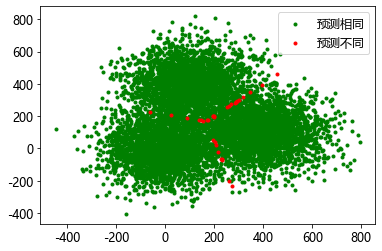

In [14]:
same = y_hat_list[0] == y_hat_list[1]  
diff = y_hat_list[0] != y_hat_list[1]  
plt.scatter(x[same, 0], x[same, 1], c='g', marker='.', label='预测相同')  
plt.scatter(x[diff, 0], x[diff, 1], c='r', marker='.', label='预测不同')  
plt.legend()  
print('相同数量:', x[same].shape[0])  
print('不同数量:', x[diff].shape[0])  

两个算法聚类结果只有 33 个样本点不同